https://www.kaggle.com/startupsci/titanic-data-science-solutions \\


https://www.kaggle.com/sinakhorami/titanic-best-working-classifier \\

https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!wget https://storage.googleapis.com/protonx-cloud-storage/titanic/train.csv
!wget https://storage.googleapis.com/protonx-cloud-storage/titanic/test.csv

--2022-08-08 11:01:16--  https://storage.googleapis.com/protonx-cloud-storage/titanic/train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.250.145.128, 74.125.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘train.csv.2’

train.csv.2         100%[===================>]  59.76K  --.-KB/s    in 0.005s  

2022-08-08 11:01:16 (12.2 MB/s) - ‘train.csv.2’ saved [61194/61194]

--2022-08-08 11:01:16--  https://storage.googleapis.com/protonx-cloud-storage/titanic/test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.250.145.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [application/octet-stream]
Saving to: ‘test.csv.2’

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train_df.loc[train_df['SibSp'] + train_df['Parch'] >= 10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.describe(percentiles=[.8, .9, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
99%,882.100000,1.000000,3.000000,65.870000,5.000000,4.000000,249.006220
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
342 / 891

0.3838383838383838

In [ ]:
train_df.loc[train_df['Cabin'] == 'G6']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# select pandas categorical columns
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Correlating categorical and numerical features

In [ ]:
train_df.loc[train_df['Embarked'] == 'C'].groupby(['Survived'], as_index=False).count()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,75,75,75,75,51,75,75,75,75,17,75
1,1,93,93,93,93,79,93,93,93,93,52,93


In [ ]:
train_df.loc[train_df['Age'] > 70.]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


### Đánh giá
- Trẻ con nhỏ hơn 4 tuổi có khả năng sống sót cao
- Người già nhất 80 tuổi còn sống
- Một số lượng lớn người từ 15 - 25 tuổi không sống
- Hầu hết có độ tuổi từ 15-35
### Quyết định
- Chú ý đến Tuổi khi training mô hình


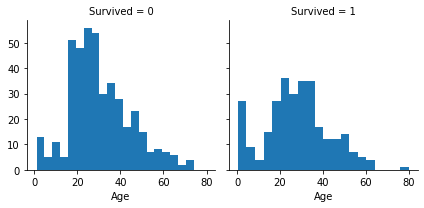

In [ ]:
import seaborn as sns
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False) \
.mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False) \
.mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False). \
mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False). \
mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
train_df[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False). \
mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
73,C62 C64,1.0
97,D21,1.0
94,D17,1.0
95,D19,1.0
60,C148,1.0
...,...,...
67,C46,0.0
64,C30,0.0
59,C128,0.0
56,C124,0.0


In [ ]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False). \
mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Correlating numerical and ordinal features


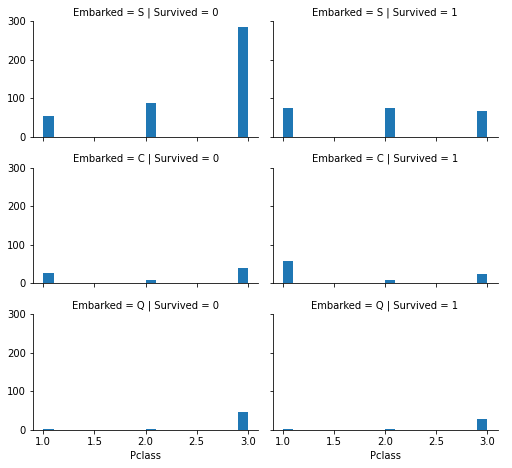

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Pclass', alpha=1, bins=20)
grid.add_legend();

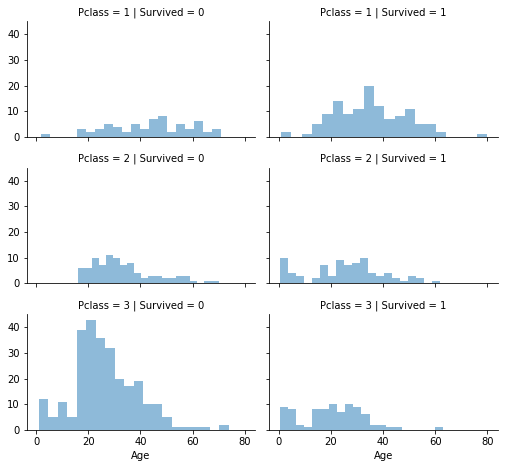

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


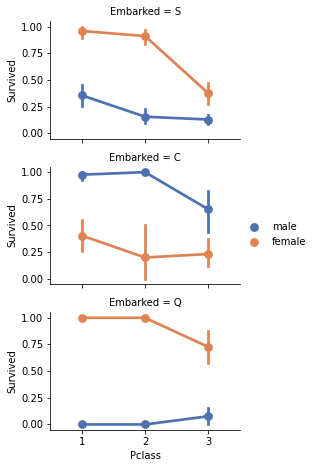

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


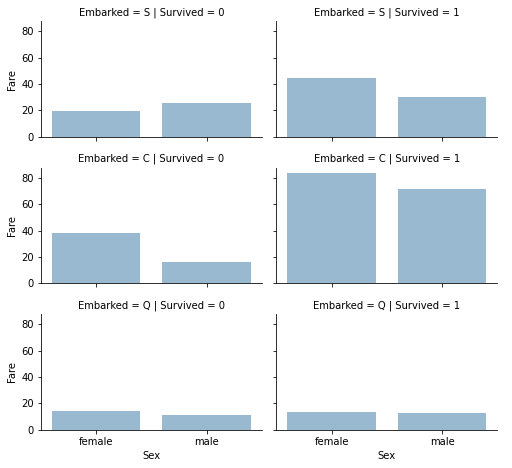

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


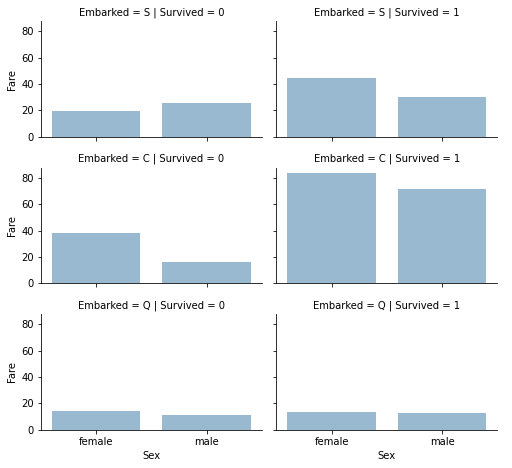

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

#### Xóa cột `Ticket` và `Cabin`

In [ ]:
print("Before", train_df.shape, test_df.shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape

Before (891, 12) (418, 11)


('After', (891, 10), (418, 9))

#### Chuyển đặc trưng loại về dạng số rời rạc

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Braund, Mr. Owen Harris",male,S
freq,1,577,644


In [ ]:
train_df['Sex'] = train_df['Sex'].map({ 'male': 0 , 'female': 1}).astype(int)

In [ ]:
train_df['Sex'].isnull().values.sum()

0

#### Sử lý missing value và null value
- Phương pháp 1: Tạo ra những số ngẫu nhiên giữa trung bình và độ lệch chuẩn
- Phương pháp 2: Sẽ chính xác hơn nếu sử dụng những đặc trưng tương quan. Chúng ta đã có tương quan giữa Tuổi, Giới tính và Hạng thương gia. Vì vậy chúng ta sẽ đoán tuổi dựa vào median của tuổi cho tập hợp Pclass và Gender. Cho nên, median Age cho Pclass=1 và Gender=0. Pclass=1 và Gender=1, ...
- Phương pháp 3: Kết hợp 2 phương pháp phía trên. Tuy nhiên thay vì dự đoán tuổi dựa trên median, sử dụng số ngẫu nhiên giữa trung bình và độ lệch chuẩn, dựa trên những tổ hợp này.
Phương pháp 1 và 3 sẽ tạo ra noise cho model của chúng ta. Ưu tiên phương pháp 2.

177 dòng có sự missing

In [ ]:
train_df['Age'].isnull().values.sum()

177

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


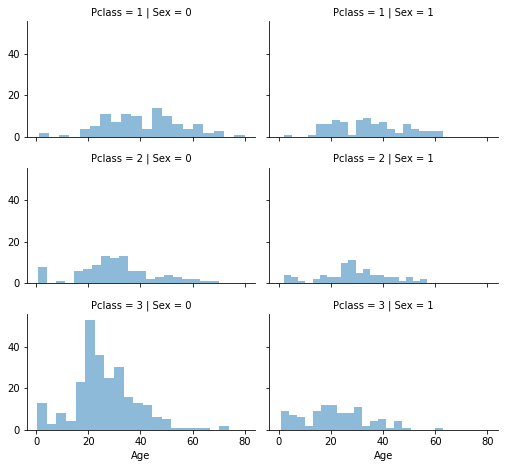

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
train_df.isna().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
all_df = [train_df]
for dataset in all_df:
  for i in range(0, 2): # Lặp qua các giới tính
    for j in range(0, 3): # Lặp qua các hạng.
      guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
      print(guess_df)

      # age_mean = guess_df.mean()
      # age_std = guess_df.std()
      # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

      # Lấy trung vị
      median = guess_df.median()
      print(median)

      # Chuẩn hóa
      guess_ages[i,j] = int( median/0.5 + 0.5 ) * 0.5

  # Cập nhật missing data
  for i in range(0, 2):
    for j in range(0, 3):
        dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                'Age'] = guess_ages[i,j]

  dataset['Age'] = dataset['Age'].astype(int)


6      54.0
23     28.0
27     19.0
30     40.0
34     28.0
       ... 
822    38.0
857    51.0
867    31.0
872    33.0
889    26.0
Name: Age, Length: 101, dtype: float64
40.0
20     35.0
21     34.0
33     66.0
70     32.0
72     21.0
       ... 
848    28.0
861    21.0
864    24.0
883    28.0
886    27.0
Name: Age, Length: 99, dtype: float64
30.0
0      22.0
4      35.0
7       2.0
12     20.0
13     39.0
       ... 
876    20.0
877    19.0
881    33.0
884    25.0
890    32.0
Name: Age, Length: 253, dtype: float64
25.0
1      38.0
3      35.0
11     58.0
52     49.0
61     38.0
       ... 
856    45.0
862    48.0
871    47.0
879    56.0
887    19.0
Name: Age, Length: 85, dtype: float64
35.0
9      14.0
15     55.0
41     27.0
43      3.0
53     29.0
       ... 
854    44.0
865    42.0
866    27.0
874    28.0
880    25.0
Name: Age, Length: 74, dtype: float64
28.0
2      26.0
8      27.0
10      4.0
14     14.0
18     31.0
       ... 
855    18.0
858    24.0
875    15.0
882    22.0
885

In [ ]:
guess_ages

array([[40. , 30. , 25. ],
       [35. , 28. , 21.5]])

In [ ]:
# select pandas categorical columns
train_df.describe(include=['O'])

,Name,Embarked
count,891,889
unique,891,3
top,"Braund, Mr. Owen Harris",S
freq,1,644


#### Tạo khoảng tuổi

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Thay thế tuổi bằng khoảng

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,"(32.0, 48.0]"


In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S


Tạo feature mới từ những feature có sẵn

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Tạo feature cô đơn

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Xóa cột Parch, SibSp, and FamilySize features in favor of IsAlone.

In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",0,2,8.0500,S,1


Kết hợp 2 cột Age và Class để có cột mới

In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


Có 2 giá trị thiếu, đổ đầy bằng giá trị xuất hiện nhiều nhất

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Chuyển đặc trưng loại thành số

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,0,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,8.0500,0,1,6


Xử lý dữ liệu số thiếu

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",male,2.0,7.8292,2,1,6.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,7.0000,0,0,6.0
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,9.6875,2,1,6.0
3,895,3,"Wirz, Mr. Albert",male,1.0,8.6625,0,1,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,12.2875,0,0,3.0


Tạo nhóm fare

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,0,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,3,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,1,0,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,3,0,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,1,0,1,6
5,6,0,3,"Moran, Mr. James",0,1,1,2,1,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,3,0,1,3
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,2,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,1,0,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,2,1,0,0


In [ ]:
X_train = train_df.drop(["Survived", 'Name'], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId", 'Name'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 7))

In [ ]:
X_train.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,1,3,0,1,0,0,0,3
1,2,1,1,2,3,1,0,2
2,3,3,1,1,1,0,1,3
3,4,1,1,2,3,0,0,2
4,5,3,0,2,1,0,1,6


In [ ]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,3,male,2.0,0,2,1,6.0
1,3,female,2.0,0,0,0,6.0
2,2,male,3.0,1,2,1,6.0
3,3,male,1.0,1,0,1,3.0
4,3,female,1.0,1,0,0,3.0


In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()